In [1]:
#importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#Baixando o dataset
!gdown 1qT5OdmoWy1tkIAbvXRx-gjVKA_GUNfO0
df = pd.read_csv('titanic_train.csv')

Downloading...
From: https://drive.google.com/uc?id=1qT5OdmoWy1tkIAbvXRx-gjVKA_GUNfO0
To: /content/titanic_train.csv
100% 61.2k/61.2k [00:00<00:00, 85.3MB/s]


In [19]:
#Vendo o dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
#Removendo a coluna PassengerId
df = df.drop('PassengerId', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [21]:
#Olhando os dados nulos:
for col in df.columns.tolist():
  print('Número de missing na coluna {}: {}'.format(col, df[col].isnull().sum()))

Número de missing na coluna Survived: 0
Número de missing na coluna Pclass: 0
Número de missing na coluna Name: 0
Número de missing na coluna Sex: 0
Número de missing na coluna Age: 177
Número de missing na coluna SibSp: 0
Número de missing na coluna Parch: 0
Número de missing na coluna Ticket: 0
Número de missing na coluna Fare: 0
Número de missing na coluna Cabin: 687
Número de missing na coluna Embarked: 2


<Axes: xlabel='Pclass'>

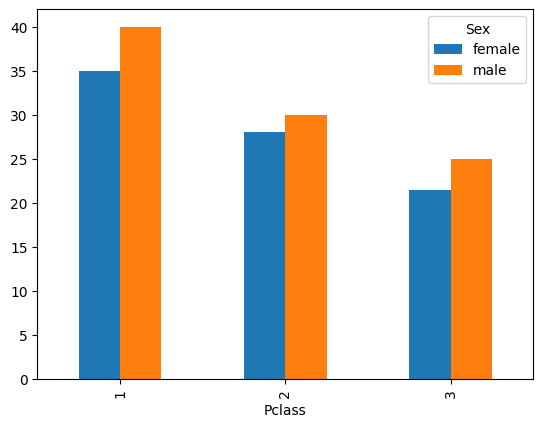

In [22]:
#Vendo a mediana da idade agrupada por Classe e Sexo
dados = df.groupby(['Pclass','Sex'])['Age'].median()
dados.unstack().plot(kind='bar')

In [23]:
#Preenchendo as idades nulas
df['Age'] = df.groupby(['Pclass','Sex'], group_keys=False)['Age'].apply(lambda x: x.fillna(x.median()))

In [24]:
#Há muitos dados nulos na Cabin
df['Cabin'].isnull().sum()

np.int64(687)

In [25]:
#Excluindo a coluna Cabin
df = df.drop('Cabin', axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
#Há poucos dados nulos na Embarked
df['Embarked'].isnull().sum()

np.int64(2)

In [27]:
#Excluindo linhas nulas na Embarked
df = df.dropna(subset=["Embarked"])

In [28]:
#Não há mais dados nulos
for col in df.columns.tolist():
  print('Número de missing na coluna {}: {}'.format(col, df[col].isnull().sum()))

Número de missing na coluna Survived: 0
Número de missing na coluna Pclass: 0
Número de missing na coluna Name: 0
Número de missing na coluna Sex: 0
Número de missing na coluna Age: 0
Número de missing na coluna SibSp: 0
Número de missing na coluna Parch: 0
Número de missing na coluna Ticket: 0
Número de missing na coluna Fare: 0
Número de missing na coluna Embarked: 0


In [29]:
#Transformando a variável Sex em numérico
df['Sex'] = df['Sex'].replace("male", 0)
df['Sex'] = df['Sex'].replace("female", 1)

<ipython-input-29-3f1bf98a8aed>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace("female", 1)


In [33]:
#Dummies
df = pd.get_dummies(df, columns=['Embarked'])

In [38]:
df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].head()

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


<ipython-input-47-4601caef9568>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = ax.text(j, i, round(heatmap[i][j], 2), ha="center", va="center", color="black")


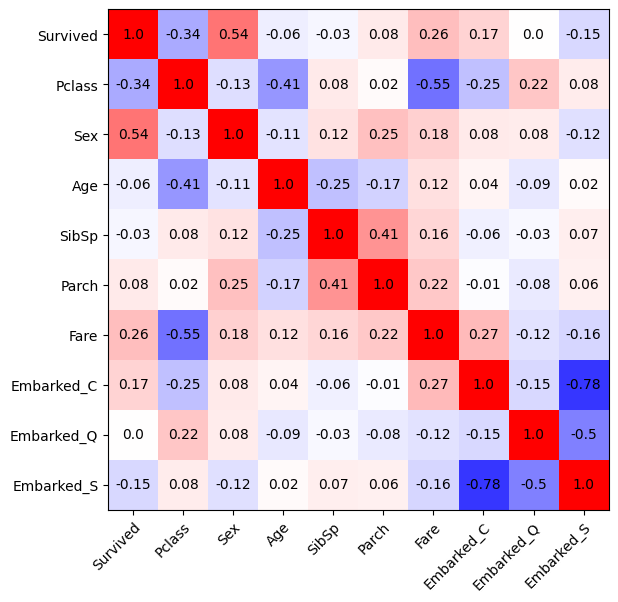

In [47]:
#Olhando correlação de colunas numéricas pelo heatmap
heatmap = df.copy()
heatmap = heatmap.drop(['Name', 'Ticket'], axis=1)
heatmap = heatmap.corr()

fig, ax = plt.subplots(figsize=(6.5, 6.5))
im = ax.imshow(heatmap, cmap='bwr', vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(heatmap.columns)), labels=heatmap.columns)
ax.set_yticks(np.arange(len(heatmap.columns)), labels=heatmap.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

heatmap = heatmap.rename(columns={"Survived": 0, "Pclass": 1, "Sex": 2, "Age": 3, "SibSp": 4, "Parch": 5, "Fare": 6, "Embarked_C": 7, "Embarked_Q": 8, "Embarked_S": 9})

for i in heatmap:
    for j in heatmap:
        text = ax.text(j, i, round(heatmap[i][j], 2), ha="center", va="center", color="black")


plt.show()

<Axes: >

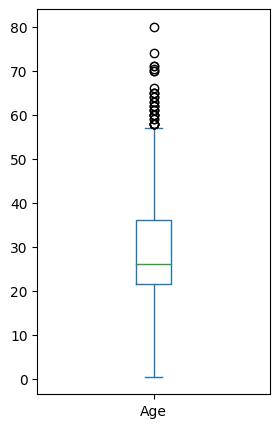

In [ ]:
#Olhando a distribuição da idade pelo bloxpot
bloxpot = df['Age']

bloxpot.plot.box(figsize=(3,5))

<Axes: >

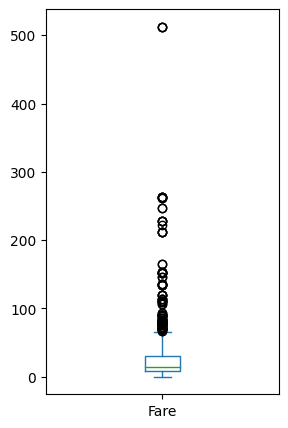

In [ ]:
#Olhando a distribuição do preço do ingresso pelo bloxpot
bloxpot = df['Fare']
bloxpot.plot.box(figsize=(3,5))